In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import random
import math
import time
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn import linear_model
from prophet import Prophet
from prophet.diagnostics import performance_metrics
from prophet.diagnostics import cross_validation
import datetime
import operator
%matplotlib inline

In [110]:
# Project Topic/Title: Predicting Covid-19 cases for healthcare systems globally.

# Problem Statement: Covid-19 is a global pandemic that has caused great stress and 
#                    impacted the world in various ways. Most notably, it has placed 
#                    great stress on the healthcare systems worldwide.

# Motivation: There is a need to predict cases as accurately as possible 
#             so that the healthcare systems can better accommodate the 
#             necessary resources for treatment, enabling them to better cope.


In [111]:
confirmed_cases = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
death_cases = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
recovered_cases = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

In [112]:
confirmed_cases.head()


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,10/5/21,10/6/21,10/7/21,10/8/21,10/9/21,10/10/21,10/11/21,10/12/21,10/13/21,10/14/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,155309,155380,155429,155448,155466,155508,155540,155599,155627,155682
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,172618,173190,173723,174168,174643,174968,175163,175664,176172,176667
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,204046,204171,204276,204388,204490,204597,204695,204790,204900,205005
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,15271,15284,15288,15291,15291,15291,15307,15307,15314,15326
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,59895,60448,60803,61023,61245,61378,61580,61794,62143,62385


In [113]:
death_cases.head()


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,10/5/21,10/6/21,10/7/21,10/8/21,10/9/21,10/10/21,10/11/21,10/12/21,10/13/21,10/14/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,7214,7220,7221,7221,7221,7225,7228,7230,7234,7238
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,2725,2734,2746,2753,2759,2768,2777,2783,2788,2797
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,5831,5838,5843,5846,5850,5853,5855,5859,5862,5864
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,130,130,130,130,130,130,130,130,130,130
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1587,1598,1603,1613,1618,1622,1629,1642,1650,1653


In [114]:
recovered_cases.head()


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,10/5/21,10/6/21,10/7/21,10/8/21,10/9/21,10/10/21,10/11/21,10/12/21,10/13/21,10/14/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [115]:
cols = confirmed_cases.keys()
cols

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '10/5/21', '10/6/21', '10/7/21', '10/8/21', '10/9/21', '10/10/21',
       '10/11/21', '10/12/21', '10/13/21', '10/14/21'],
      dtype='object', length=636)

In [116]:
confirmed_filtered = confirmed_cases.loc[:, cols[4]:cols[-1]]
confirmed_filtered.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,10/5/21,10/6/21,10/7/21,10/8/21,10/9/21,10/10/21,10/11/21,10/12/21,10/13/21,10/14/21
0,0,0,0,0,0,0,0,0,0,0,...,155309,155380,155429,155448,155466,155508,155540,155599,155627,155682
1,0,0,0,0,0,0,0,0,0,0,...,172618,173190,173723,174168,174643,174968,175163,175664,176172,176667
2,0,0,0,0,0,0,0,0,0,0,...,204046,204171,204276,204388,204490,204597,204695,204790,204900,205005
3,0,0,0,0,0,0,0,0,0,0,...,15271,15284,15288,15291,15291,15291,15307,15307,15314,15326
4,0,0,0,0,0,0,0,0,0,0,...,59895,60448,60803,61023,61245,61378,61580,61794,62143,62385


In [117]:
singapore_confirmed_filtered = confirmed_cases[confirmed_cases["Country/Region"] == "Singapore"].loc[:, cols[4]:cols[-1]]
singapore_confirmed_filtered

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,10/5/21,10/6/21,10/7/21,10/8/21,10/9/21,10/10/21,10/11/21,10/12/21,10/13/21,10/14/21
230,0,1,3,3,4,5,7,7,10,13,...,109804,113381,116864,120454,124157,126966,129229,132205,135395,138327


In [118]:
deaths_filtered = death_cases.loc[:, cols[4]:cols[-1]]
deaths_filtered.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,10/5/21,10/6/21,10/7/21,10/8/21,10/9/21,10/10/21,10/11/21,10/12/21,10/13/21,10/14/21
0,0,0,0,0,0,0,0,0,0,0,...,7214,7220,7221,7221,7221,7225,7228,7230,7234,7238
1,0,0,0,0,0,0,0,0,0,0,...,2725,2734,2746,2753,2759,2768,2777,2783,2788,2797
2,0,0,0,0,0,0,0,0,0,0,...,5831,5838,5843,5846,5850,5853,5855,5859,5862,5864
3,0,0,0,0,0,0,0,0,0,0,...,130,130,130,130,130,130,130,130,130,130
4,0,0,0,0,0,0,0,0,0,0,...,1587,1598,1603,1613,1618,1622,1629,1642,1650,1653


In [119]:
recovered_filtered = recovered_cases.loc[:, cols[4]:cols[-1]]
recovered_filtered.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,10/5/21,10/6/21,10/7/21,10/8/21,10/9/21,10/10/21,10/11/21,10/12/21,10/13/21,10/14/21
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [120]:

dates = confirmed_filtered.keys()
world_cases = []
singapore_cases = []
total_deaths = [] 
mortality_rate = []
total_recovered = [] 

for i in dates:
    confirmed_sum = confirmed_filtered[i].sum()
    singapore_confirmed_sum = singapore_confirmed_filtered[i].sum()
    death_sum = deaths_filtered[i].sum()
    recovered_sum = recovered_filtered[i].sum()
    world_cases.append(confirmed_sum)
    singapore_cases.append(singapore_confirmed_sum)
    total_deaths.append(death_sum)
    mortality_rate.append(death_sum/confirmed_sum)
    total_recovered.append(recovered_sum)

In [121]:
confirmed_sum, death_sum, recovered_sum, world_cases, singapore_cases

(239608139,
 4882066,
 0,
 [557,
  655,
  941,
  1434,
  2118,
  2927,
  5578,
  6167,
  8235,
  9927,
  12038,
  16787,
  19887,
  23898,
  27643,
  30805,
  34399,
  37130,
  40161,
  42769,
  44811,
  45229,
  60381,
  66909,
  69052,
  71235,
  73270,
  75152,
  75652,
  76212,
  76841,
  78602,
  78982,
  79550,
  80404,
  81381,
  82740,
  84128,
  86022,
  88400,
  90379,
  92980,
  95282,
  98100,
  102016,
  106113,
  110051,
  114230,
  119055,
  126717,
  132519,
  146875,
  157974,
  169251,
  184036,
  200039,
  219595,
  246703,
  277579,
  309721,
  344828,
  387489,
  428574,
  479649,
  542582,
  607566,
  677326,
  734000,
  799335,
  876256,
  959241,
  1042396,
  1126208,
  1185351,
  1256187,
  1330136,
  1399770,
  1483065,
  1570050,
  1655372,
  1729757,
  1849387,
  1920407,
  2004274,
  2082496,
  2178189,
  2266231,
  2343419,
  2420184,
  2495741,
  2571745,
  2653236,
  2737234,
  2821349,
  2903700,
  2975167,
  3045416,
  3121220,
  3198418,
  3281704,
  

In [122]:

days_since_1_22 = np.array([i for i in range(len(dates))]).reshape(-1, 1)
world_cases = np.array(world_cases).reshape(-1, 1)
singapore_cases = np.array(singapore_cases).reshape(-1, 1)
total_deaths = np.array(total_deaths).reshape(-1, 1)
total_recovered = np.array(total_recovered).reshape(-1, 1)

days_since_1_22

array([[  0],
       [  1],
       [  2],
       [  3],
       [  4],
       [  5],
       [  6],
       [  7],
       [  8],
       [  9],
       [ 10],
       [ 11],
       [ 12],
       [ 13],
       [ 14],
       [ 15],
       [ 16],
       [ 17],
       [ 18],
       [ 19],
       [ 20],
       [ 21],
       [ 22],
       [ 23],
       [ 24],
       [ 25],
       [ 26],
       [ 27],
       [ 28],
       [ 29],
       [ 30],
       [ 31],
       [ 32],
       [ 33],
       [ 34],
       [ 35],
       [ 36],
       [ 37],
       [ 38],
       [ 39],
       [ 40],
       [ 41],
       [ 42],
       [ 43],
       [ 44],
       [ 45],
       [ 46],
       [ 47],
       [ 48],
       [ 49],
       [ 50],
       [ 51],
       [ 52],
       [ 53],
       [ 54],
       [ 55],
       [ 56],
       [ 57],
       [ 58],
       [ 59],
       [ 60],
       [ 61],
       [ 62],
       [ 63],
       [ 64],
       [ 65],
       [ 66],
       [ 67],
       [ 68],
       [ 69],
       [ 70],
      

In [123]:
world_cases

array([[      557],
       [      655],
       [      941],
       [     1434],
       [     2118],
       [     2927],
       [     5578],
       [     6167],
       [     8235],
       [     9927],
       [    12038],
       [    16787],
       [    19887],
       [    23898],
       [    27643],
       [    30805],
       [    34399],
       [    37130],
       [    40161],
       [    42769],
       [    44811],
       [    45229],
       [    60381],
       [    66909],
       [    69052],
       [    71235],
       [    73270],
       [    75152],
       [    75652],
       [    76212],
       [    76841],
       [    78602],
       [    78982],
       [    79550],
       [    80404],
       [    81381],
       [    82740],
       [    84128],
       [    86022],
       [    88400],
       [    90379],
       [    92980],
       [    95282],
       [    98100],
       [   102016],
       [   106113],
       [   110051],
       [   114230],
       [   119055],
       [   126717],


In [124]:
days_in_future = 10
future_forecast = np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1, 1)
adjusted_dates = future_forecast[:-10]

future_forecast

array([[  0],
       [  1],
       [  2],
       [  3],
       [  4],
       [  5],
       [  6],
       [  7],
       [  8],
       [  9],
       [ 10],
       [ 11],
       [ 12],
       [ 13],
       [ 14],
       [ 15],
       [ 16],
       [ 17],
       [ 18],
       [ 19],
       [ 20],
       [ 21],
       [ 22],
       [ 23],
       [ 24],
       [ 25],
       [ 26],
       [ 27],
       [ 28],
       [ 29],
       [ 30],
       [ 31],
       [ 32],
       [ 33],
       [ 34],
       [ 35],
       [ 36],
       [ 37],
       [ 38],
       [ 39],
       [ 40],
       [ 41],
       [ 42],
       [ 43],
       [ 44],
       [ 45],
       [ 46],
       [ 47],
       [ 48],
       [ 49],
       [ 50],
       [ 51],
       [ 52],
       [ 53],
       [ 54],
       [ 55],
       [ 56],
       [ 57],
       [ 58],
       [ 59],
       [ 60],
       [ 61],
       [ 62],
       [ 63],
       [ 64],
       [ 65],
       [ 66],
       [ 67],
       [ 68],
       [ 69],
       [ 70],
      

In [125]:
# Convert all the integers into datetime for better visualization

start = '1/22/2020'
start_date = datetime.datetime.strptime(start, '%m/%d/%Y')
future_forecast_dates = []
for i in range(len(future_forecast)):
    future_forecast_dates.append((start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))

In [126]:
latest_confirmed = confirmed_filtered[dates[-1]]
latest_deaths = deaths_filtered[dates[-1]]
latest_recoveries = recovered_filtered[dates[-1]]

latest_confirmed, latest_deaths, latest_recoveries

(0      155682
 1      176667
 2      205005
 3       15326
 4       62385
         ...  
 274    853842
 275    446294
 276      9467
 277    209431
 278    132251
 Name: 10/14/21, Length: 279, dtype: int64,
 0       7238
 1       2797
 2       5864
 3        130
 4       1653
        ...  
 274    20950
 275     4547
 276     1793
 277     3657
 278     4655
 Name: 10/14/21, Length: 279, dtype: int64,
 0      0
 1      0
 2      0
 3      0
 4      0
       ..
 259    0
 260    0
 261    0
 262    0
 263    0
 Name: 10/14/21, Length: 264, dtype: int64)

In [127]:
unique_countries = list(confirmed_cases['Country/Region'].unique())
unique_countries

['Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burma',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo (Brazzaville)',
 'Congo (Kinshasa)',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czechia',
 'Denmark',
 'Diamond Princess',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guatemala',
 'Guinea',
 'Guinea-Bissau',
 'Guyana',

In [128]:
start = '1/22/2020'
start_date = datetime.datetime.strptime(start, '%m/%d/%Y')
future_forecast_dates = []
for i in range(len(future_forecast)):
    future_forecast_dates.append((start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))

In [129]:
#print(days_since_1_22)

# print(future_forecast_dates)
# print(dates)

new_future_dates = []
start_of_new_future_dates = (datetime.datetime.strptime(dates[-1], '%m/%d/%y') + datetime.timedelta(days=1)).strftime('%m-%d-%y')
days_to_add = 10
for i in range(days_to_add):
    new_future_dates.append((datetime.datetime.strptime(start_of_new_future_dates, '%m-%d-%y') + datetime.timedelta(days=i)).strftime('%m-%d-%y'))

new_future_dates

['10-15-21',
 '10-16-21',
 '10-17-21',
 '10-18-21',
 '10-19-21',
 '10-20-21',
 '10-21-21',
 '10-22-21',
 '10-23-21',
 '10-24-21']

**Singapore Cases**

In [130]:
df = pd.DataFrame(columns=['ds','y'])
df['y'] = [x[0] for x in singapore_cases]
dates = [date.replace('/','-') for date in dates]
df['ds'] = dates
df['ds'] = pd.to_datetime(df['ds'])

df

,ds,y
0,2020-01-22,0
1,2020-01-23,1
2,2020-01-24,3
3,2020-01-25,3
4,2020-01-26,4
...,...,...
627,2021-10-10,126966
628,2021-10-11,129229
629,2021-10-12,132205
630,2021-10-13,135395


**Prophet model - Singapore Cases**

In [131]:
model = Prophet()
model.fit(df)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [132]:
future = pd.DataFrame(columns=['ds'])
#future['ds'] = new_future_dates
my_future_forecast_dates = [date.replace('/','-') for date in future_forecast_dates]
future['ds'] = my_future_forecast_dates

future

,ds
0,01-22-2020
1,01-23-2020
2,01-24-2020
3,01-25-2020
4,01-26-2020
...,...
637,10-20-2021
638,10-21-2021
639,10-22-2021
640,10-23-2021


          ds         yhat    yhat_lower   yhat_upper
0 2020-01-22 -4095.907514 -11532.910826  3128.199000
1 2020-01-23 -3880.935888 -11695.201117  3574.499583
2 2020-01-24 -4201.255129 -11992.027005  3219.262017
3 2020-01-25 -4015.469568 -12209.726850  3794.608567
4 2020-01-26 -3833.756614 -10746.500186  3775.624275


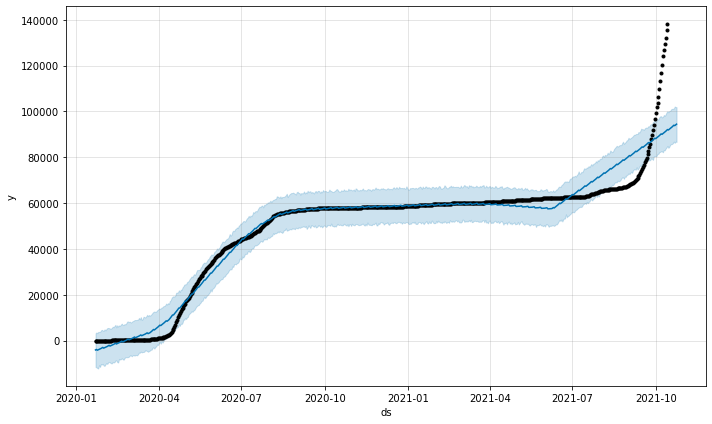

In [133]:
forecast = model.predict(future)

print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())
model.plot(forecast)
plt.show()

In [134]:
#https://facebook.github.io/prophet/docs/diagnostics.html
df_cv = cross_validation(model, horizon='60 days', initial='365 days', period='30 days')

df_cv

INFO:prophet:Making 7 forecasts with cutoffs between 2021-02-16 00:00:00 and 2021-08-15 00:00:00
100%|██████████| 7/7 [00:36<00:00,  5.18s/it]


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2021-02-17,59806.739945,59574.629233,60051.008050,59821,2021-02-16
1,2021-02-18,59828.625592,59583.046735,60087.027277,59832,2021-02-16
2,2021-02-19,59858.543131,59589.918694,60130.276062,59846,2021-02-16
3,2021-02-20,59874.911314,59603.101083,60146.829960,59858,2021-02-16
4,2021-02-21,59897.261927,59577.313459,60210.404391,59869,2021-02-16
...,...,...,...,...,...,...
415,2021-10-10,67043.585328,61557.283572,72796.167917,126966,2021-08-15
416,2021-10-11,67059.812216,61519.789710,72872.677485,129229,2021-08-15
417,2021-10-12,67092.944041,61167.718864,73020.908746,132205,2021-08-15
418,2021-10-13,67147.230323,61150.874571,73480.764369,135395,2021-08-15


In [135]:
df_diagnostics = performance_metrics(df_cv)
df_diagnostics

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,6 days,2.722490e+05,521.774869,312.981828,0.004861,0.003090,0.004891,0.738095
1,7 days,2.873172e+05,536.019736,334.406896,0.005197,0.003529,0.005229,0.738095
2,8 days,3.111800e+05,557.835123,362.847439,0.005643,0.003749,0.005677,0.714286
3,9 days,3.438554e+05,586.391816,391.633016,0.006090,0.003916,0.006128,0.714286
4,10 days,3.854707e+05,620.862873,421.598545,0.006554,0.004060,0.006597,0.714286
5,11 days,4.363047e+05,660.533621,452.241429,0.007025,0.004233,0.007073,0.714286
6,12 days,4.858718e+05,697.045021,480.968718,0.007465,0.004233,0.007519,0.714286
7,13 days,5.549057e+05,744.919939,513.546004,0.007959,0.004233,0.008020,0.714286
8,14 days,6.184772e+05,786.433183,541.986023,0.008387,0.004067,0.008457,0.714286
9,15 days,7.039846e+05,839.037882,575.111061,0.008883,0.003943,0.008962,0.714286


**World Cases**

,ds,y
0,2020-01-22,557
1,2020-01-23,655
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118
...,...,...
596,2021-09-09,223313958
597,2021-09-10,223947302
598,2021-09-11,224398781
599,2021-09-12,224762976


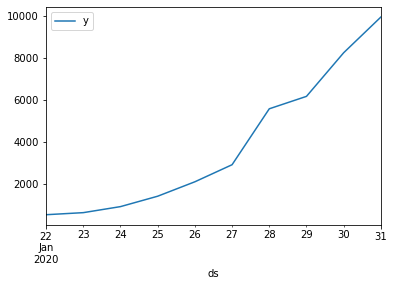

In [176]:
df = pd.DataFrame(columns=['ds','y'])
df['y'] = [x[0] for x in world_cases]
dates = [date.replace('/','-') for date in dates]
df['ds'] = dates
df['ds'] = pd.to_datetime(df['ds'])

df_train = df.loc[:600]

df_train.iloc[0:10].plot(x="ds")
df_train


In [137]:
df_test = df.loc[601:]
df_test

,ds,y
601,2021-09-14,225922702
602,2021-09-15,226491083
603,2021-09-16,227065902
604,2021-09-17,227659305
605,2021-09-18,228192357
606,2021-09-19,228549852
607,2021-09-20,229090633
608,2021-09-21,229559016
609,2021-09-22,230096150
610,2021-09-23,230606918


**Prophet Model - World Cases**

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


          ds          yhat     yhat_lower     yhat_upper
0 2020-01-22 -39342.520033 -197505.574266  122181.803252
1 2020-01-23  10892.072795 -156608.885501  173632.270033
2 2020-01-24  55071.835444 -104133.755608  218779.052938
3 2020-01-25  44031.904554 -110622.612186  206493.391007
4 2020-01-26 -17332.558764 -175822.367490  156581.727424


AttributeError: 'Figure' object has no attribute 'ticklabel_format'

<Figure size 432x288 with 0 Axes>

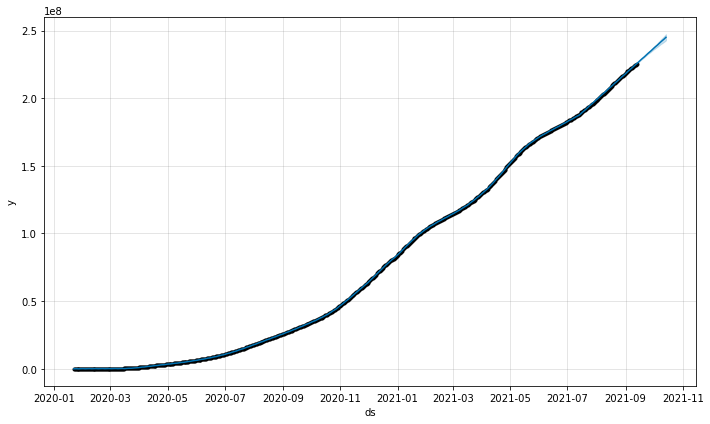

In [188]:
model = Prophet(daily_seasonality=True,changepoint_range=0.9,n_changepoints=50)
model.fit(df_train)

fut = model.make_future_dataframe(periods=31)
forecast = model.predict(fut)

print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())
fig = plt.figure()
forecast_plot = forecast.copy()
#forecast_plot.yhat = format(float(forecast_plot.yhat),',')
ax = model.plot(forecast_plot)
ax.ticklabel_format(style='plain')
#ax.yaxis.set_major_formatter(plt.ticker.FuncFormatter(lambda x,p: format(int(x),',')))
plt.show()

In [159]:
future = pd.DataFrame(columns=['ds'])
#future['ds'] = new_future_dates
#my_future_forecast_dates = [date.replace('/','-') for date in future_forecast_dates]
future['ds'] = df_test['ds'].copy()

future

,ds
601,2021-09-14
602,2021-09-15
603,2021-09-16
604,2021-09-17
605,2021-09-18
606,2021-09-19
607,2021-09-20
608,2021-09-21
609,2021-09-22
610,2021-09-23


          ds          yhat     yhat_lower     yhat_upper
0 2020-01-22 -39342.520033 -208773.088588  124892.724111
1 2020-01-23  10892.072795 -148474.427210  175380.567169
2 2020-01-24  55071.835444 -101481.624530  233705.347526
3 2020-01-25  44031.904554 -122074.078031  202108.724848
4 2020-01-26 -17332.558764 -183950.601161  136261.225212


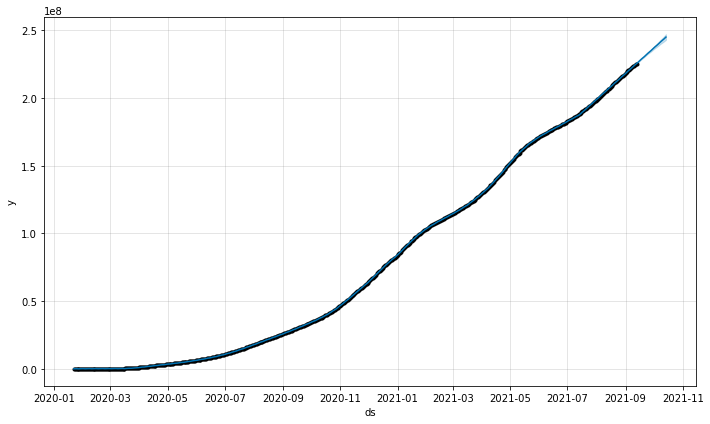

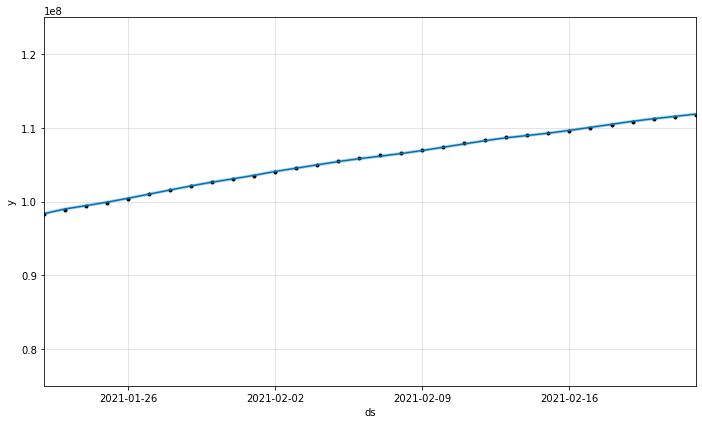

In [173]:
model.plot(forecast)
plt.xlim([datetime.date(2021, 1, 22), datetime.date(2021, 2, 22)])
plt.ylim([75000000, 125000000])
plt.show()

<AxesSubplot:title={'center':'World Covid Prediction vs Actual'}, xlabel='ds'>

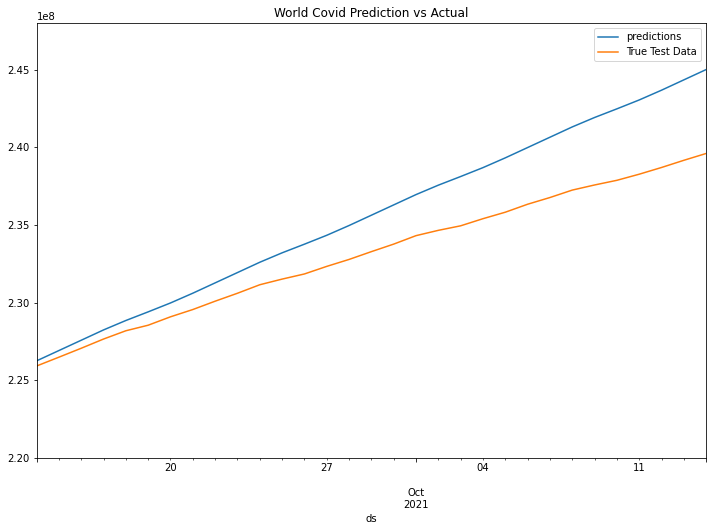

In [162]:
ax=forecast.plot(x='ds',y='yhat',legend=True,label='predictions',figsize=(12,8))
df_test.plot(x='ds',y='y',legend=True,label='True Test Data',xlim=('2021-09-14','2021-10-14'),ylim=([220000000,248000000]),ax=ax,title='World Covid Prediction vs Actual')

In [157]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-22,8.469770e+02,-2.510338e+05,2.052936e+05,8.469770e+02,8.469770e+02,-20103.869760,-20103.869760,-20103.869760,-2351.321255,-2351.321255,-2351.321255,-17752.548505,-17752.548505,-17752.548505,0.0,0.0,0.0,-1.925689e+04
1,2020-01-23,2.828815e+03,-1.943776e+05,2.544033e+05,2.828815e+03,2.828815e+03,25147.396901,25147.396901,25147.396901,-2351.321255,-2351.321255,-2351.321255,27498.718156,27498.718156,27498.718156,0.0,0.0,0.0,2.797621e+04
2,2020-01-24,4.810654e+03,-1.667992e+05,3.105520e+05,4.810654e+03,4.810654e+03,65692.708539,65692.708539,65692.708539,-2351.321255,-2351.321255,-2351.321255,68044.029794,68044.029794,68044.029794,0.0,0.0,0.0,7.050336e+04
3,2020-01-25,6.792492e+03,-1.678121e+05,2.851952e+05,6.792492e+03,6.792492e+03,50053.425444,50053.425444,50053.425444,-2351.321255,-2351.321255,-2351.321255,52404.746698,52404.746698,52404.746698,0.0,0.0,0.0,5.684592e+04
4,2020-01-26,8.774331e+03,-2.308280e+05,2.330641e+05,8.774331e+03,8.774331e+03,-14599.272462,-14599.272462,-14599.272462,-2351.321255,-2351.321255,-2351.321255,-12247.951207,-12247.951207,-12247.951207,0.0,0.0,0.0,-5.824942e+03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
627,2021-10-10,2.424840e+08,2.407009e+08,2.442158e+08,2.407111e+08,2.441547e+08,-14599.272462,-14599.272462,-14599.272462,-2351.321255,-2351.321255,-2351.321255,-12247.951207,-12247.951207,-12247.951207,0.0,0.0,0.0,2.424694e+08
628,2021-10-11,2.431062e+08,2.411428e+08,2.448270e+08,2.411701e+08,2.449010e+08,-64742.220197,-64742.220197,-64742.220197,-2351.321255,-2351.321255,-2351.321255,-62390.898942,-62390.898942,-62390.898942,0.0,0.0,0.0,2.430414e+08
629,2021-10-12,2.437284e+08,2.415785e+08,2.455990e+08,2.417019e+08,2.456689e+08,-57907.417248,-57907.417248,-57907.417248,-2351.321255,-2351.321255,-2351.321255,-55556.095993,-55556.095993,-55556.095993,0.0,0.0,0.0,2.436704e+08
630,2021-10-13,2.443505e+08,2.421489e+08,2.464574e+08,2.422386e+08,2.464229e+08,-20103.869760,-20103.869760,-20103.869760,-2351.321255,-2351.321255,-2351.321255,-17752.548505,-17752.548505,-17752.548505,0.0,0.0,0.0,2.443304e+08


In [190]:
compare = pd.DataFrame(columns=['yhat','actual'])

compare['yhat'] = forecast['yhat']
compare['actual'] = df['y']
compare['diff'] = abs(compare['actual'] - compare['yhat'])

compare

,yhat,actual,diff
0,-3.934252e+04,557,3.989952e+04
1,1.089207e+04,655,1.023707e+04
2,5.507184e+04,941,5.413084e+04
3,4.403190e+04,1434,4.259790e+04
4,-1.733256e+04,2118,1.945056e+04
...,...,...,...
627,2.424803e+08,237879268,4.601017e+06
628,2.430529e+08,238272643,4.780272e+06
629,2.436819e+08,238705193,4.976659e+06
630,2.443432e+08,239167859,5.175307e+06


In [142]:
#https://facebook.github.io/prophet/docs/diagnostics.html
df_cv = cross_validation(model, horizon='60 days', initial='365 days', period='30 days')

df_cv

INFO:prophet:Making 6 forecasts with cutoffs between 2021-02-15 00:00:00 and 2021-07-15 00:00:00
100%|██████████| 6/6 [00:22<00:00,  3.80s/it]


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2021-02-16,1.126616e+08,1.121691e+08,1.131292e+08,109627491,2021-02-15
1,2021-02-17,1.132986e+08,1.127845e+08,1.138350e+08,110022607,2021-02-15
2,2021-02-18,1.139580e+08,1.134916e+08,1.144552e+08,110427639,2021-02-15
3,2021-02-19,1.145969e+08,1.141172e+08,1.151077e+08,110839002,2021-02-15
4,2021-02-20,1.152066e+08,1.146671e+08,1.157412e+08,111210976,2021-02-15
...,...,...,...,...,...,...
355,2021-09-09,2.267835e+08,2.228256e+08,2.306272e+08,223313958,2021-07-15
356,2021-09-10,2.274584e+08,2.232979e+08,2.315028e+08,223947302,2021-07-15
357,2021-09-11,2.280334e+08,2.238389e+08,2.321616e+08,224398781,2021-07-15
358,2021-09-12,2.285557e+08,2.244540e+08,2.327077e+08,224762976,2021-07-15


In [143]:
df_diagnostics = performance_metrics(df_cv)
df_diagnostics

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,6 days,1.757074e+13,4.191747e+06,4.087213e+06,0.027069,0.027053,0.026983,0.000000
1,7 days,1.887812e+13,4.344895e+06,4.235678e+06,0.028016,0.027245,0.027921,0.000000
2,8 days,2.026436e+13,4.501595e+06,4.382936e+06,0.028954,0.027556,0.028851,0.000000
3,9 days,2.169520e+13,4.657810e+06,4.524302e+06,0.029838,0.027672,0.029729,0.000000
4,10 days,2.323575e+13,4.820348e+06,4.667333e+06,0.030713,0.028171,0.030598,0.000000
5,11 days,2.479469e+13,4.979427e+06,4.802302e+06,0.031527,0.028341,0.031406,0.000000
6,12 days,2.639029e+13,5.137148e+06,4.931651e+06,0.032300,0.029053,0.032174,0.000000
7,13 days,2.802644e+13,5.294001e+06,5.056426e+06,0.033042,0.029806,0.032910,0.000000
8,14 days,2.969449e+13,5.449265e+06,5.173504e+06,0.033728,0.030561,0.033591,0.000000
9,15 days,3.149593e+13,5.612123e+06,5.292518e+06,0.034438,0.031208,0.034294,0.000000


In [144]:
df_diagnostics.mean()

horizon         33 days 00:00:00
mse         58107034565922.34375
rmse              7468828.691918
mae               6566404.399487
mape                    0.040724
mdape                    0.04068
smape                   0.040528
coverage                0.169697
dtype: object

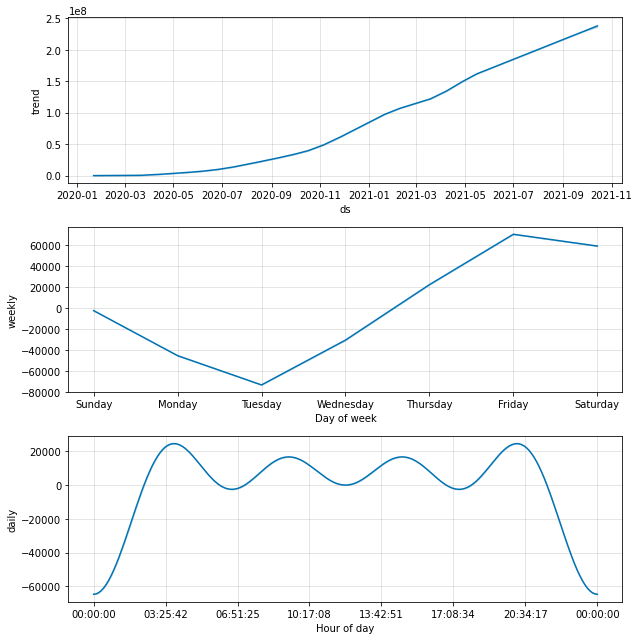

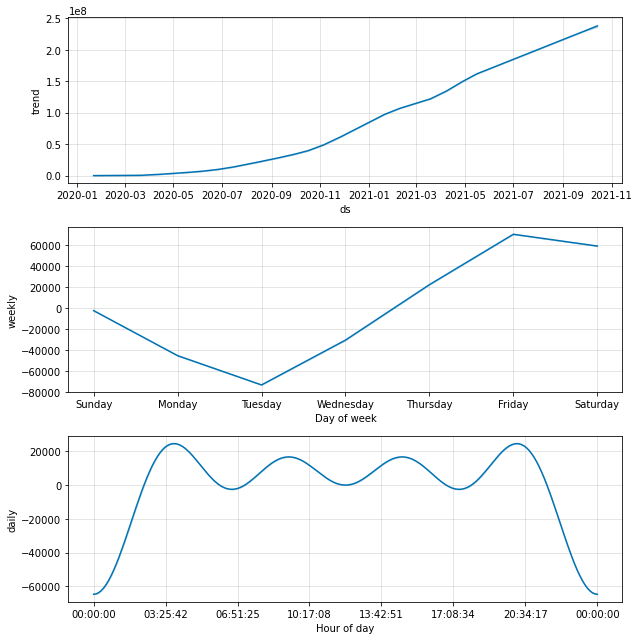

In [145]:
model.plot_components(forecast)

In [146]:
metric_df = forecast.set_index('ds')[['yhat']].join(df.set_index('ds').y).reset_index()
metric_df.dropna(inplace=True)
r2_score(metric_df.y, metric_df.yhat)

0.9997984620257991

In [147]:
metric_df

,ds,yhat,y
0,2020-01-22,-1.098352e+05,557
1,2020-01-23,-5.226950e+04,655
2,2020-01-24,5.229371e+02,941
3,2020-01-25,-5.879995e+03,1434
4,2020-01-26,-6.255219e+04,2118
...,...,...,...
627,2021-10-10,2.357822e+08,237879268
628,2021-10-11,2.362441e+08,238272643
629,2021-10-12,2.367210e+08,238705193
630,2021-10-13,2.372684e+08,239167859
